In [1]:
# Problema classificar se uma pessoa comprar ou nao um produto com base na idade, renda e sexo
# importa bibliotecas 
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/danielvieira95/Inteligencia_Artificial_2025/refs/heads/main/bases_de_dados/Social_Network_Ads.csv')

In [ ]:
df.head() # exibe as primeiras linhas do dataframe

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
# Criando um dicionário para substituir o nome de cada coluna
dicionario = {
    'User ID': 'Usuario','Gender':'Genero','Age': 'Idade','EstimatedSalary':'Salario Estimado',
    'Purchased':'Comprou'
}

In [5]:
df.rename(columns=dicionario,inplace=True) # renomeia a coluna

In [6]:
df.head()

,Usuario,Genero,Idade,Salario Estimado,Comprou
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
# importa as bibliotecas necessárias para a análise de dados
import matplotlib.pyplot as plt # importa a matplotlib
from sklearn.svm import SVC # importa da biblioteca SVM o modelo SVC
from sklearn.preprocessing import StandardScaler # faz a normalização dos dados
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score,f1_score
from matplotlib.colors import ListedColormap # importa a biblioteca matplotlib

In [8]:
# Seleciona as colunas do dataframe
X = df.iloc[:,[2,3]].values # pega os valores da primeira coluna ate a coluna 3
Y = df.iloc[:,[-1]].values # pega a ultima coluna do dataframe

In [ ]:
X

In [ ]:
Y

In [11]:
# importa as bibliotecas para dividir os dados em treino e teste
from sklearn.model_selection import train_test_split # importa o metodo train teste split 


In [12]:
# dividindo os dados em treino e teste
X_treino, X_teste, Y_treino,Y_teste= train_test_split(X,Y,test_size=0.3,random_state=3)

In [13]:
# Normalizando os dados com Standscaler
sc = StandardScaler() # armazena o Stand Scaller na variavel sc 

In [14]:
# Normalização dos dados X_treino e X_teste
X_treino=sc.fit_transform(X_treino)
X_teste=sc.fit_transform(X_teste)

In [15]:
# Criando o algoritmo de ML - Machine Learning SVM
algoritmo = SVC(kernel='linear',random_state=3)

In [16]:
# Treinando o algoritmo de Machine Learning SVM
algoritmo.fit(X_treino,Y_treino)

C:\Users\sn1076220\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [17]:
# Realizando  previsoes
y_prev=algoritmo.predict(X_teste)

In [ ]:
y_prev

In [ ]:
#Exibindo o X_teste
X_teste

In [20]:
# Aplicando a transformada inversa nos dados
X_teste_padrao = sc.inverse_transform(X_teste)

In [ ]:
# Exibindo o X_teste_padrao
X_teste_padrao

In [23]:
# Gerando a matriz de confusão
cm = confusion_matrix(Y_teste,y_prev)
cm

array([[72,  6],
       [13, 29]])

In [ ]:
# Calculando as metricas
acc = accuracy_score(Y_teste,y_prev)
# acc = (VP + VN) /(VP+VN+FP+FN)
acc

0.8416666666666667

In [ ]:
# Precisão
# prec = VP / VP+ FP
prec = precision_score(Y_teste,y_prev)
prec

0.8285714285714286

In [26]:
# Metrica Recall
# recal = VP / VP+ FN
recall = recall_score(Y_teste,y_prev)
recall

0.6904761904761905

In [ ]:
#Metrica F1_score
#F1score= 2*precision *recall/(precision*recall)
f1score= f1_score(Y_teste,y_prev)
f1score

0.7532467532467533

In [28]:
# importando a seaborn
import seaborn as sns


Text(70.72222222222221, 0.5, 'Previsão')

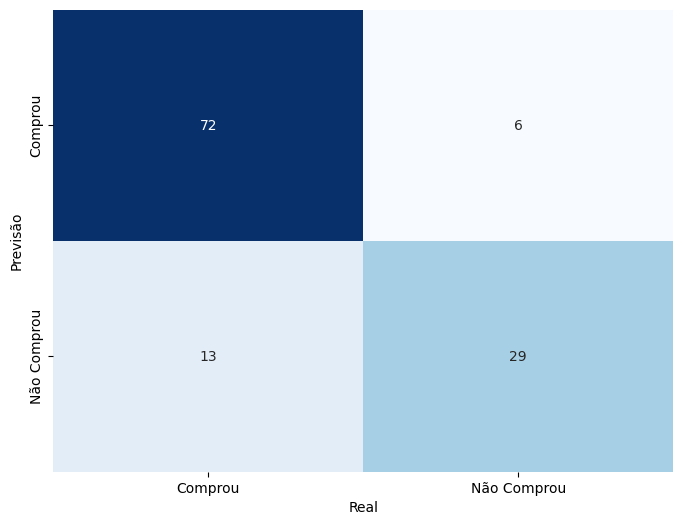

In [29]:
plt.figure(figsize=(8,6)) # define o tamanho da figura
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',cbar=False,xticklabels=['Comprou','Não Comprou'],
            yticklabels=['Comprou','Não Comprou'])
plt.xlabel('Real')
plt.ylabel('Previsão')

C:\Users\sn1076220\AppData\Local\Temp\ipykernel_108100\4134767581.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(_X[_Y==j,0],_X[_Y==j,1],c=ListedColormap(('gray','black'))(i),label=j)


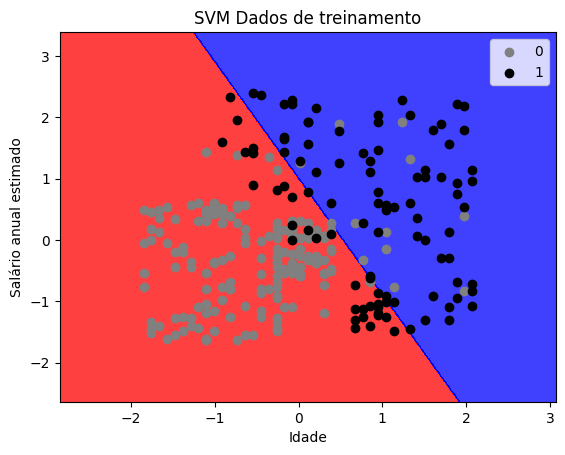

In [45]:
# Plotando o grafico  com os dados
import numpy as np

_X,_Y = X_treino,Y_treino.ravel()
X1,X2= np.meshgrid(np.arange(start=_X[:,0].min()-1,stop=_X[:,0].max()+1,step=0.01),np.arange(start=_X[:,1].min()-1,stop=_X[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,algoritmo.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha=0.75,cmap=ListedColormap(('red','blue')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(_Y)):
    plt.scatter(_X[_Y==j,0],_X[_Y==j,1],c=ListedColormap(('gray','black'))(i),label=j)
plt.title('SVM Dados de treinamento')
plt.xlabel('Idade')
plt.ylabel('Salário anual estimado')
plt.legend()
plt.show()

C:\Users\sn1076220\AppData\Local\Temp\ipykernel_108100\812004841.py:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(_X[_Y==j,0],_X[_Y==j,1],c=ListedColormap(('gray','black'))(i),label=j)


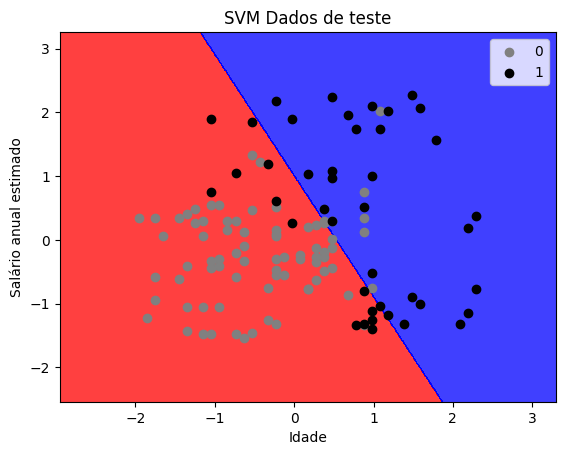

In [46]:
_X,_Y = X_teste,Y_teste.ravel()
X1,X2= np.meshgrid(np.arange(start=_X[:,0].min()-1,stop=_X[:,0].max()+1,step=0.01),np.arange(start=_X[:,1].min()-1,stop=_X[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,algoritmo.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha=0.75,cmap=ListedColormap(('red','blue')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(_Y)):
    plt.scatter(_X[_Y==j,0],_X[_Y==j,1],c=ListedColormap(('gray','black'))(i),label=j)
plt.title('SVM Dados de teste')
plt.xlabel('Idade')
plt.ylabel('Salário anual estimado')
plt.legend()
plt.show()

In [48]:
# Aplicando a transformação nos dados
X = df.iloc[:,[2,3]].values
y = df.iloc[:,-1].values
# Divide a base de dados
X_treino,X_teste,y_treino,y_teste=train_test_split(X,y,test_size=0.25,random_state=3)
# Padronização dos dados
sc =StandardScaler()
X_treino=sc.fit_transform(X_treino)
X_teste= sc.fit_transform(X_teste)
algoritmo = SVC(kernel='linear',random_state=3)
algoritmo.fit(X_treino,y_treino)
#Previsão dos resultados
algoritmo.predict(X_teste)
# Inversão dos dados para teste
X_teste_inverse = sc.inverse_transform(X_teste)
# Visualização dos resultados dos dados de teste
plt.figure(figsize=(10,6))
# Pontos para as duas classes
plt.scatter(X_teste_inverse[y_prev==0,0],X_teste_inverse[y_prev==0,1],c='red',label='Não compra')
plt.scatter(X_teste_inverse[y_prev==1,0],X_teste_inverse[y_prev==1,1],c='blue',label='Compra')
plt.title('SVM -Dados de teste')
plt.xlabel('Idade')
plt.ylabel('Salário Anual Estimado')
plt.legend()
plt.show()

IndexError: boolean index did not match indexed array along axis 0; size of axis is 100 but size of corresponding boolean axis is 120

<Figure size 1000x600 with 0 Axes>